# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
!pip install -U scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\79049\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Считывание файла

In [75]:
df = pd.read_csv('dataset.csv')

# EDA - Разведывательный анализ данных.

In [76]:
df.shape

(114000, 21)

В датасете 114000 строк и 21 колонки.

Просмотрим информацию о датасете:

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Описание числовых признаков датасета:

In [78]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
#Вывод по тому что представляет собой датасет:
#у нас есть датасет с 21 колонкой:
#1 Unnamed: 0 = просто нумерует строки (тип число)
#2 track_id = айди трека (тип строка)
#3 artists = имя музыкантов (тип строка)
#4 album_name = название альбома (тип строка)
#5 track_name = название трека (тип строка)
#6 popularity = популярность (тип число, min знычение -- 0, max -- 100)
#7 duration_ms = продолжительность трека в мс (тип число, min значение -- 0, max -- 5.237295e+06)
#8 explict = откровенность (булевой тип)
#9 danceability = танцевальность (тип число с плавающей точкой, min значение -- 0, max -- 1)
#10 energy = энергичность (тип число с плавающей точкой, min значение -- 0, max -- 1)
#11 key = тональность (тип число, min значение -- 0, max -- 11)
#12 loudness = громкость (тип число с плавающей точкой, min значение -- -49.531000, max -- 4.532000)
#13 mode = лад (тип число от 0 до 1)
#14 speechiness = присутствие текста (тип число с плавающей точкой, min значение -- 0.000000, max -- 0.965000)
#15 acousticness = акустика (тип число с плавающей точкой, min значение -- 0.000000, max -- 0.996000)
#16 instrumentalness = иструментальность (тип число с плавающей точкой, min значение -- 0.000000, max -- 1.000000)
#17 liveness = живое исполнение (тип число с плавающей точкой, min значение -- 0.000000, max -- 1.000000)
#18 valence = насколько трек позиттивный (тип число с плавающей точкой, min значение -- 0.000000, max -- 0.995000)
#19 tempo = темп (тип число с плавающей точкой, min значение -- 0.000000, max -- 243.372000)
#20 time_signature = размер (тип число, min значение -- 0, max -- 5)
#21 track_genre = жанр трека (тип строка)

Просмотрим наличие дубликатов:

In [79]:
df.loc[df.duplicated()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Дубликатов нет.

Далее просмотрим сумму пустых значений в каждом столбце:

In [80]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Удалим найденные строки и выведем измененный результат:

In [81]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

Оценим то, какие у нас есть категориальные и численные столбцы

In [82]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['track_id', 'artists', 'album_name', 'track_name', 'track_genre'] 
 Число столблцов =  5
Числовые данные:	  ['Unnamed: 0', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'] 
 Число столблцов =  16


<Axes: >

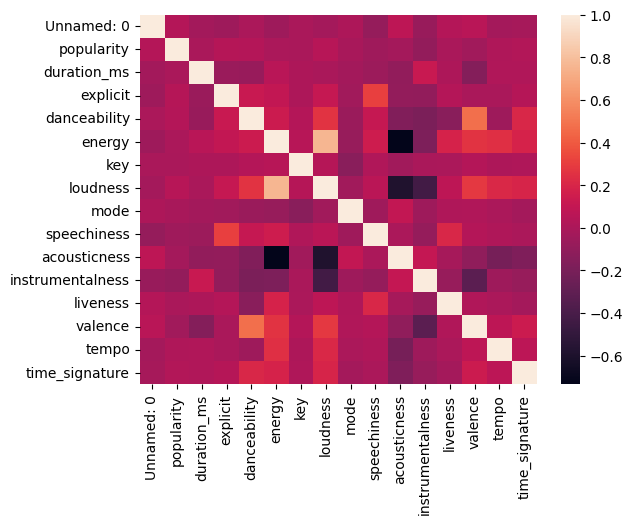

In [83]:
sns.heatmap(df.corr(numeric_only=True))

Рассмотрим гистограммы (распределение) значений по каждому числовому признаку:

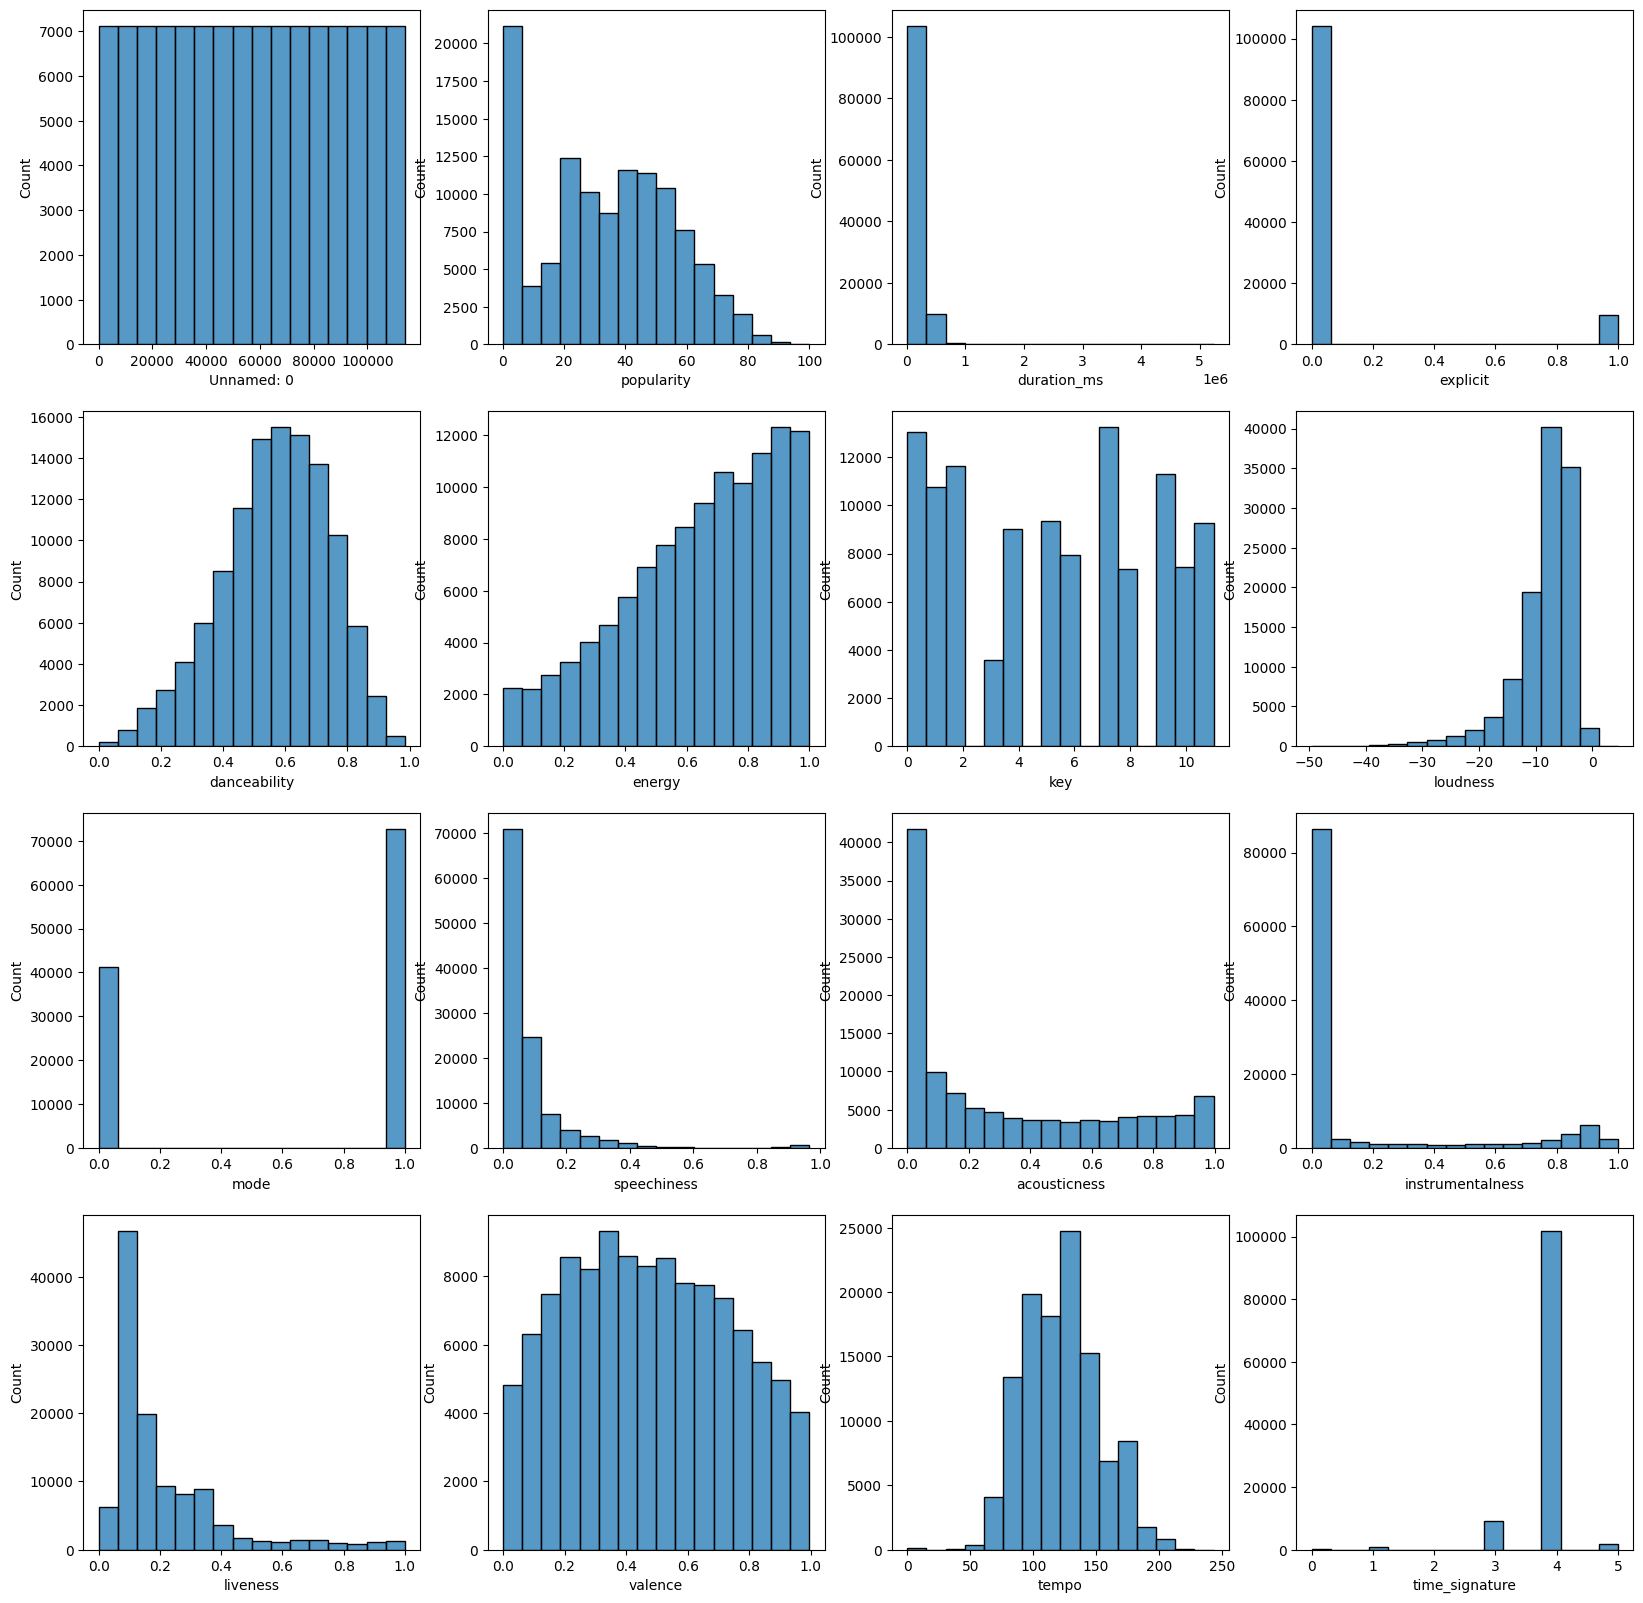

In [25]:
width = 4
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,20))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name,
            bins = 16);

Столбцы имеют аномалии, например, `popularity`, `duration_ms` и `time_signature`. Чтобы лучше понять эти аномалии посмотрим на столбцы поближе.

`Unnamed`является просто нумеровкой строк и не имеет влиянии.

Начнем с `popularity`.

<Axes: xlabel='popularity', ylabel='Count'>

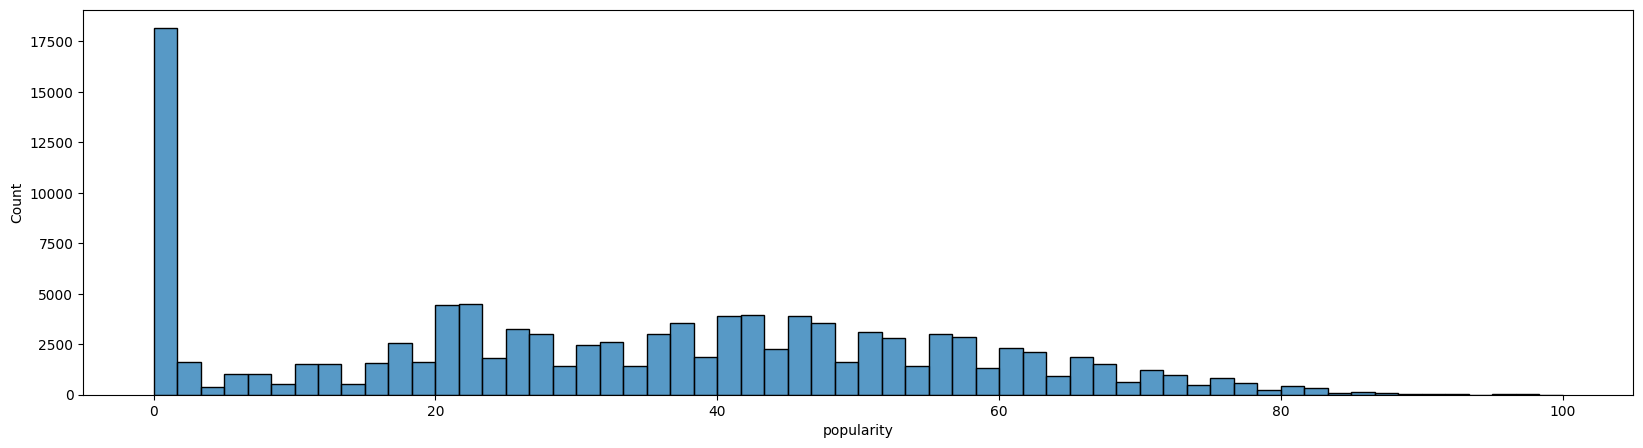

In [84]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='popularity',
             bins = 60)

В логарифимическом мастштабе:

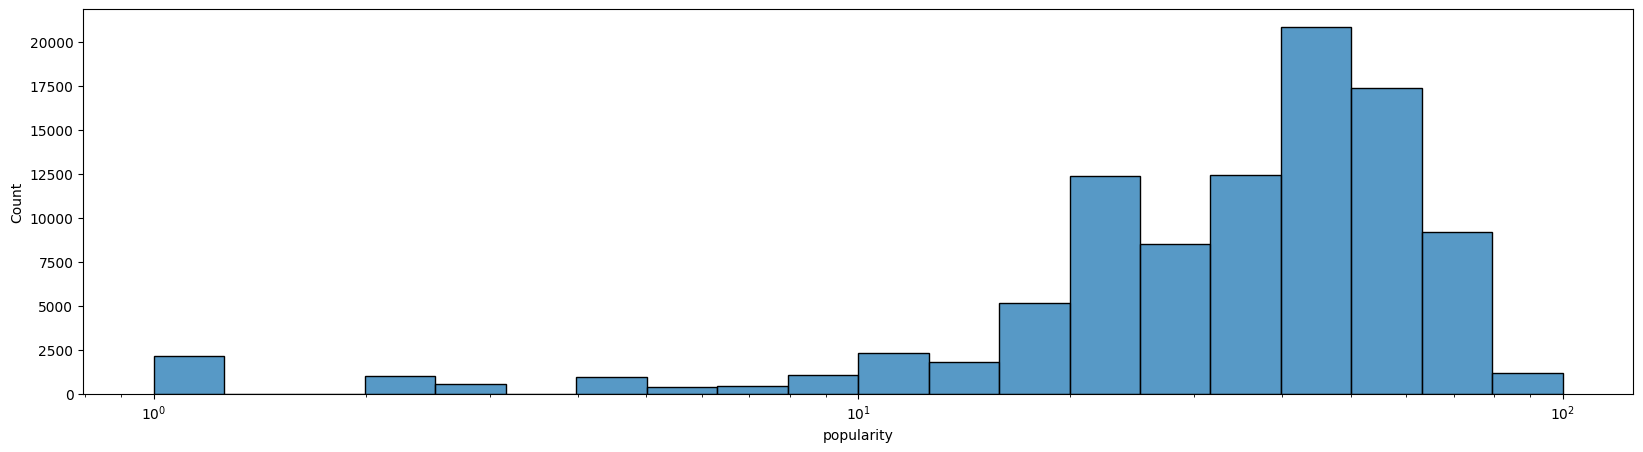

In [27]:
plt.figure(figsize=(20,5)) # создаем "полотно", уточняем размер
sns.histplot(data=df, # какой датафрейм используем
             x='popularity', # какую переменную отрисовываем
             bins = 20, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

Заметим, что у нас много объектов, `popularity` которых равна 0. Удалим их и посмотрим на изменения в графике.

<Axes: xlabel='popularity', ylabel='Count'>

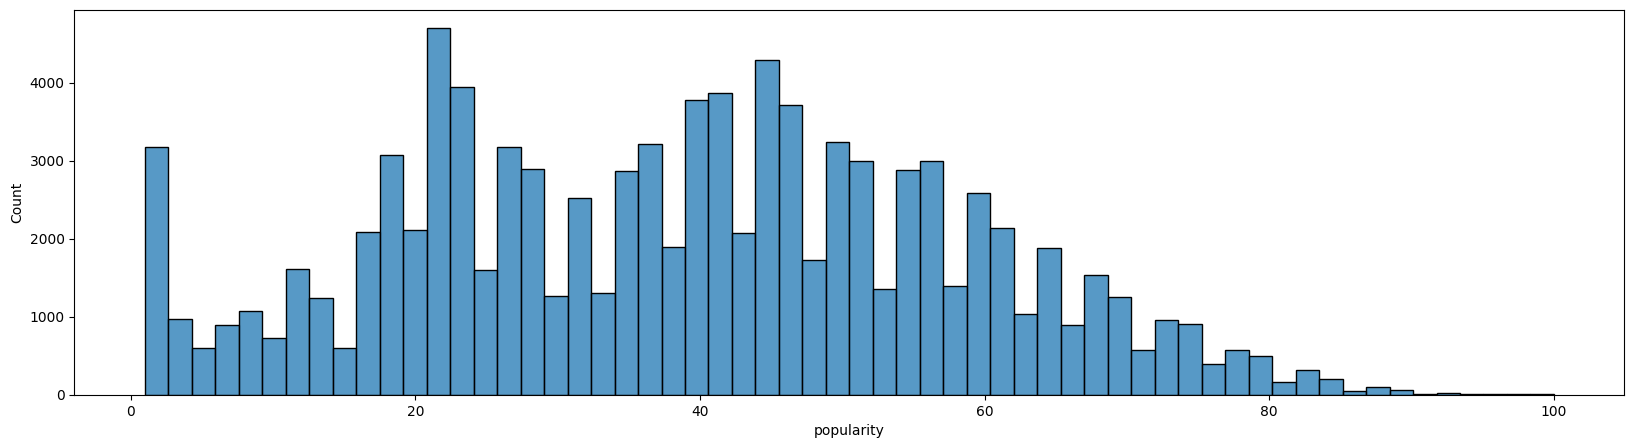

In [85]:
question_dist = df[df.popularity == 0] # через логическое индексирование определяем проблемные данные
df = df.drop(question_dist.index) # удаляем данные по проблемным индексам

# снова отобразим распределение
plt.figure(figsize=(20,5))
sns.histplot(data=df,
             x='popularity',
             bins = 60)

По такому же принципу почистим столбцы с `time_signature` и `duration`. Уберем данные, значения которых равны 0.

In [86]:
#time_signature
question_dist = df[df.time_signature == 0]
df = df.drop(question_dist.index)

#duration
question_dist = df[df.duration_ms == 0]
df = df.drop(question_dist.index)

Оценим, насколько у нас сократилось количество данных после внесенных изменений и как изменились гистограммы.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97821 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        97821 non-null  int64  
 1   track_id          97821 non-null  object 
 2   artists           97821 non-null  object 
 3   album_name        97821 non-null  object 
 4   track_name        97821 non-null  object 
 5   popularity        97821 non-null  int64  
 6   duration_ms       97821 non-null  int64  
 7   explicit          97821 non-null  bool   
 8   danceability      97821 non-null  float64
 9   energy            97821 non-null  float64
 10  key               97821 non-null  int64  
 11  loudness          97821 non-null  float64
 12  mode              97821 non-null  int64  
 13  speechiness       97821 non-null  float64
 14  acousticness      97821 non-null  float64
 15  instrumentalness  97821 non-null  float64
 16  liveness          97821 non-null  float64
 1

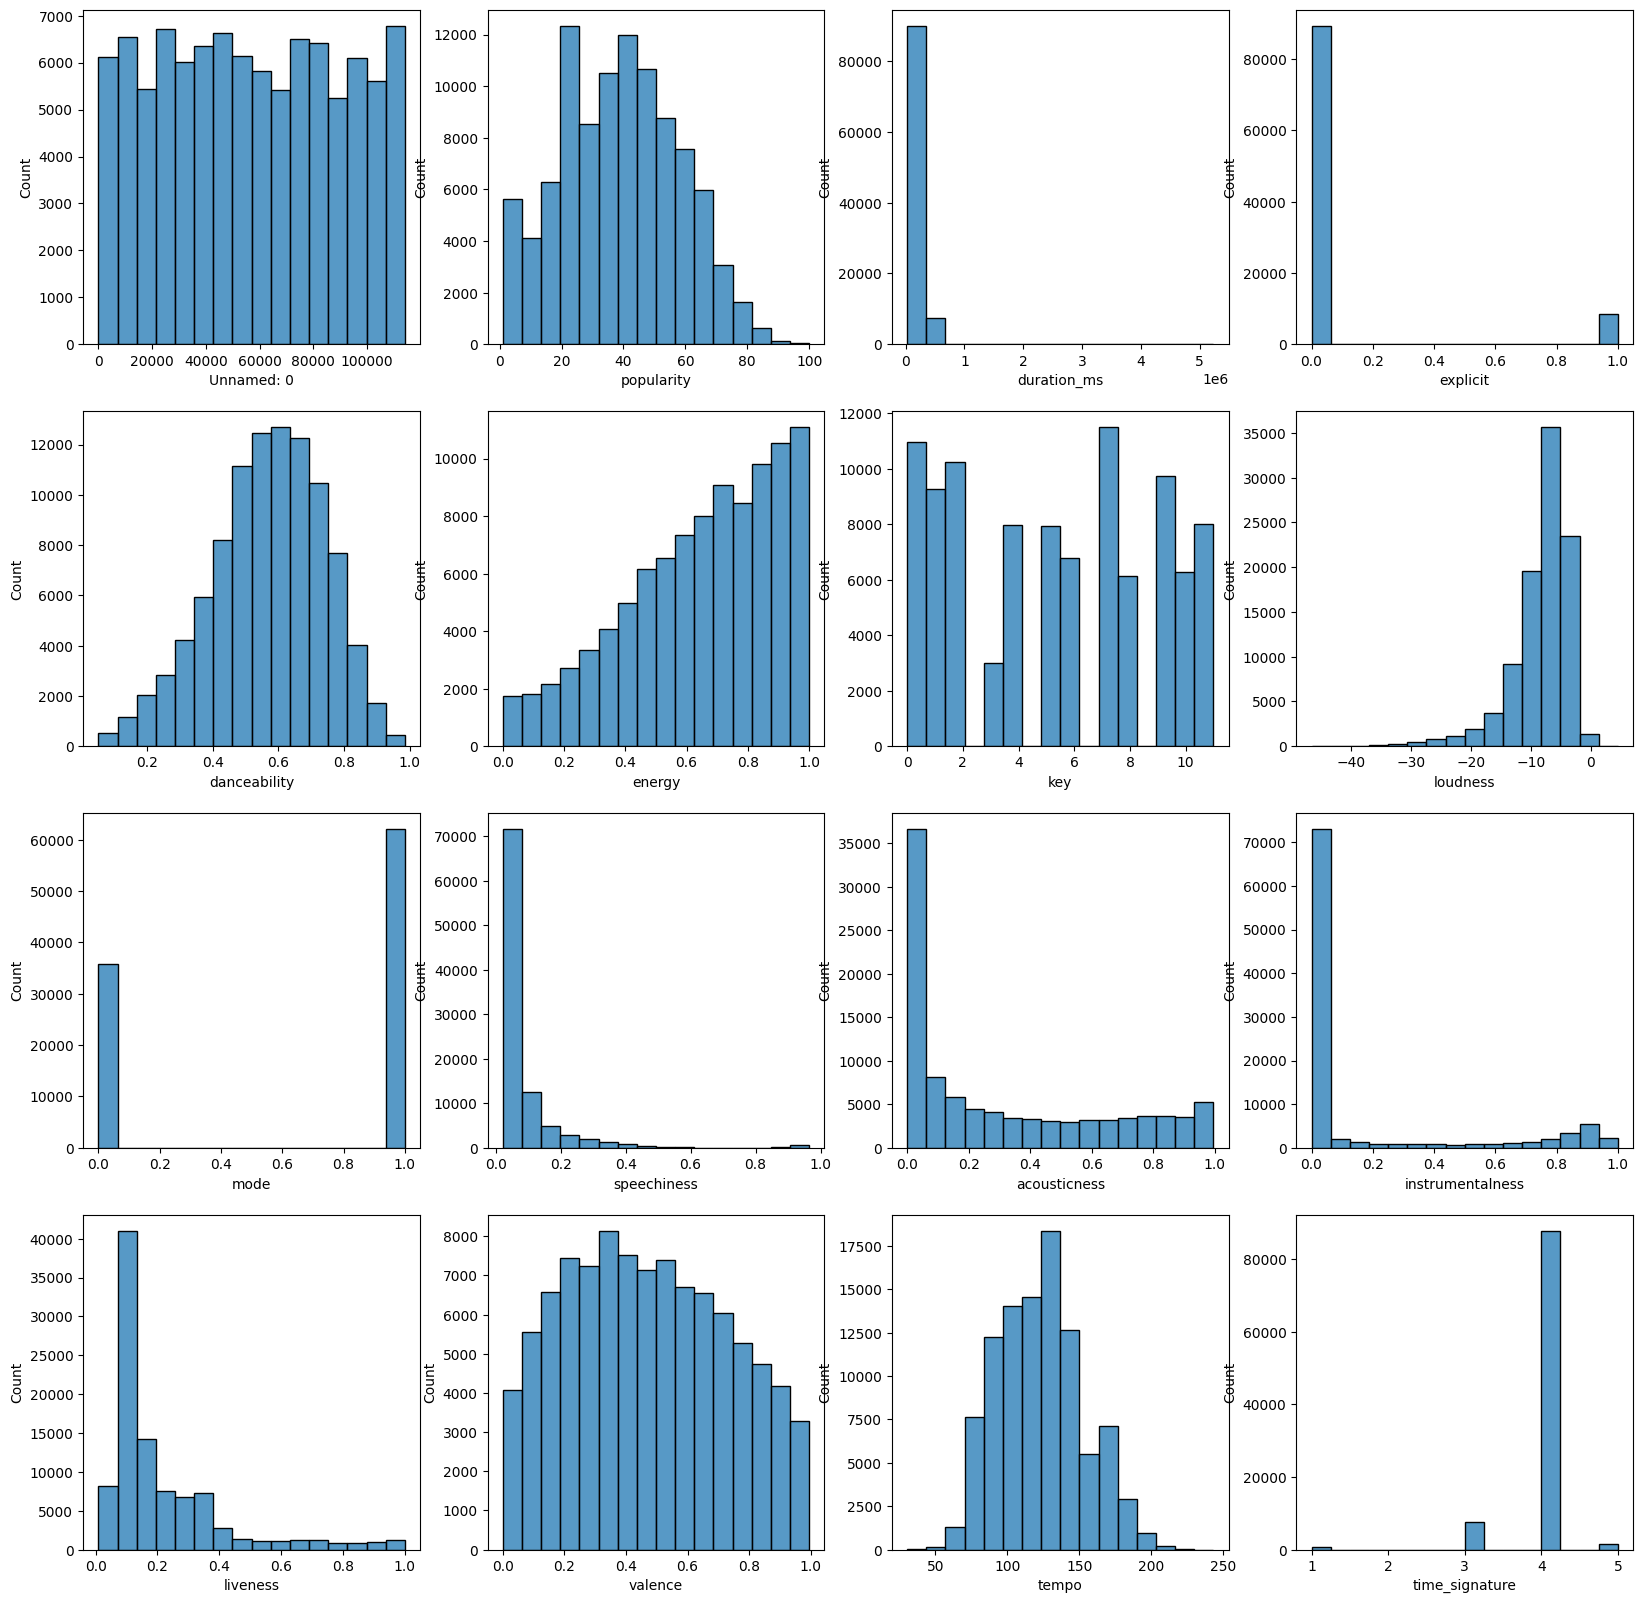

In [88]:
width = 4
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(20,20))

for idx, column_name in enumerate(num_columns):
    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name,
            bins = 16);

Мы видим, что появились изменения в графиках. Самые явные - в `popularity`.

# Feature Engineering

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
# Кодирование категориальных признаков
df['explicit'] = df['explicit'].astype(int)  # True/False -> 1/0
genre_counts = df['track_genre'].value_counts()
df['track_genre'] = df['track_genre'].map(genre_counts)
artists_counts = df['artists'].value_counts()
df['artists'] = df['artists'].map(artists_counts)

In [90]:
scaler = MinMaxScaler()
num_data = df.select_dtypes(exclude=['object', 'bool'])
nonnum_data = df.select_dtypes(include=['object', 'bool'])
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97821 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        97821 non-null  int64  
 1   artists           97821 non-null  int64  
 2   popularity        97821 non-null  int64  
 3   duration_ms       97821 non-null  int64  
 4   explicit          97821 non-null  int64  
 5   danceability      97821 non-null  float64
 6   energy            97821 non-null  float64
 7   key               97821 non-null  int64  
 8   loudness          97821 non-null  float64
 9   mode              97821 non-null  int64  
 10  speechiness       97821 non-null  float64
 11  acousticness      97821 non-null  float64
 12  instrumentalness  97821 non-null  float64
 13  liveness          97821 non-null  float64
 14  valence           97821 non-null  float64
 15  tempo             97821 non-null  float64
 16  time_signature    97821 non-null  int64  
 1

In [91]:
nonnum_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97821 entries, 0 to 113999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   track_id    97821 non-null  object
 1   album_name  97821 non-null  object
 2   track_name  97821 non-null  object
dtypes: object(3)
memory usage: 3.0+ MB


In [92]:
scaled_df = scaler.fit_transform(num_data)
print(scaled_df)

[[0.00000000e+00 3.23741007e-02 7.27272727e-01 ... 2.70335602e-01
  7.50000000e-01 9.17888563e-01]
 [8.77200677e-06 4.31654676e-02 5.45454545e-01 ... 2.21389345e-01
  7.50000000e-01 9.17888563e-01]
 [1.75440135e-05 0.00000000e+00 5.65656566e-01 ... 2.15958695e-01
  7.50000000e-01 9.17888563e-01]
 ...
 [9.99982456e-01 4.67625899e-02 2.12121212e-01 ... 4.79023703e-01
  7.50000000e-01 9.78005865e-01]
 [9.99991228e-01 8.99280576e-02 4.04040404e-01 ... 4.95836658e-01
  7.50000000e-01 9.78005865e-01]
 [1.00000000e+00 4.67625899e-02 2.12121212e-01 ... 2.29410936e-01
  7.50000000e-01 9.78005865e-01]]


In [93]:
num_df = pd.DataFrame(scaled_df, columns = ['Unnamed: 0', 'artists',	'popularity',	'duration_ms', 'explicit', 'danceability',	'energy',	'key',	'loudness',	'mode',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo',	'time_signature', 'track_genre'])

Объединяем два DataFrame обратно в один.

In [94]:
df = pd.concat([num_df, nonnum_data], axis=1)
df.isna().sum()
df = df.dropna()

In [95]:
df.tail(3)

,Unnamed: 0,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_id,album_name,track_name
97818,0.999982,0.046763,0.212121,0.047420,0.0,0.618721,0.328986,0.000000,0.698238,0.0,...,0.870482,0.0,0.075347,0.746734,0.479024,0.75,0.978006,2AjPFi6CcjGXlvt1rkrDRD,Clube Do Araújo (Vol. 1),Chave Cópia
97819,0.999991,0.089928,0.404040,0.049803,0.0,0.573739,0.505990,0.636364,0.698355,1.0,...,0.382530,0.0,0.263184,0.415075,0.495837,0.75,0.978006,1SSNtvKafiLUwra6arwoC8,Intensamente Hoje!,Sinal De Fumaça - Ao Vivo
97820,1.000000,0.046763,0.212121,0.041734,0.0,0.508407,0.486990,0.090909,0.711754,0.0,...,0.683735,0.0,0.080797,0.711558,0.229411,0.75,0.978006,1U0HD56JV97AhTJgNHfngc,Ao Vivasso 2.0 (Ao Vivo),Na Hora H - Ao Vivo


In [38]:
df.describe()

,Unnamed: 0,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
count,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000,113998.000000
mean,0.499999,0.086070,0.332385,0.041969,0.085502,0.575432,0.641382,0.482647,0.763406,0.637555,0.087723,0.316171,0.156052,0.213551,0.476448,0.501897,0.780807,0.991245
std,0.288681,0.149607,0.223049,0.020521,0.279628,0.176186,0.251531,0.323638,0.093028,0.480708,0.109568,0.333859,0.309557,0.190375,0.260565,0.123179,0.086525,0.093156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249996,0.003597,0.170000,0.031648,0.000000,0.462944,0.472000,0.181818,0.730962,0.000000,0.037202,0.016968,0.000000,0.098000,0.261307,0.407681,0.800000,1.000000
50%,0.499991,0.028777,0.350000,0.039077,0.000000,0.588832,0.685000,0.454545,0.786619,1.000000,0.050674,0.169679,0.000042,0.132000,0.466332,0.501360,0.800000,1.000000
75%,0.750004,0.093525,0.500000,0.048371,0.000000,0.705584,0.854000,0.727273,0.823632,1.000000,0.087565,0.600151,0.049000,0.273000,0.686432,0.575543,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Вычислим среднюю популярность для каждого объекта `artists`:

In [ ]:
#df = pd.DataFrame(df)
#sr = df.groupby('artists')['popularity'].mean()
#src = df.groupby('artists')['popularity'].count()
#df['artists'] = df['artists'].map(sr)

Удалим ненужные нам признаки - `Unnamed`, `track_id`, `track_name` и `album_name`.

In [96]:
df = df.drop(columns = ['Unnamed: 0', 'track_id', 'track_name', 'album_name'])

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#dummies = pd.get_dummies(df, columns = ['explicit', 'track_genre'], drop_first = True)

In [ ]:
#encoder = OneHotEncoder(sparse_output=False)
#one_hot_encoded = encoder.fit_transform(df[['explicit', 'track_genre']])
#one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['explicit', 'track_genre']))
#df = pd.concat([df.drop(['explicit', 'track_genre'], axis=1), one_hot_df], axis=1)
#df.info()

In [ ]:
#df.isna().sum()

In [98]:
df = df.dropna()

R2 score on train set: 0.9147927296009557
R2 score on test set: 0.5174941133311806
Feature Importances:
             Feature  Importance
15       track_genre    0.286077
10  instrumentalness    0.070744
1        duration_ms    0.070221
0            artists    0.066962
9       acousticness    0.063383
6           loudness    0.062884
12           valence    0.062553
3       danceability    0.061079
4             energy    0.058809
8        speechiness    0.055181
13             tempo    0.053928
11          liveness    0.048679
5                key    0.023536
2           explicit    0.006924
7               mode    0.005507
14    time_signature    0.003534


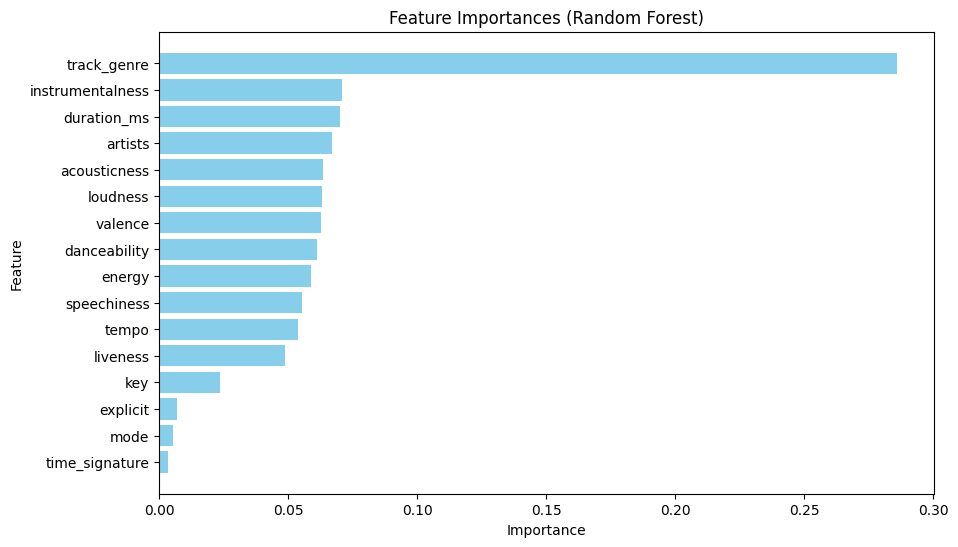

In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Разделение на X и y
X = df.drop('popularity', axis=1)  # Признаки
y = df['popularity']  # Целевая переменная

# Масштабирование не требуется для Random Forest

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Шаг 2: Простая модель - Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Оценка качества модели
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R2 score on train set: {r2_train}")
print(f"R2 score on test set: {r2_test}")

# Шаг 3: Feature Importances
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances_rf)

# Шаг 4: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_rf['Feature'], feature_importances_rf['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

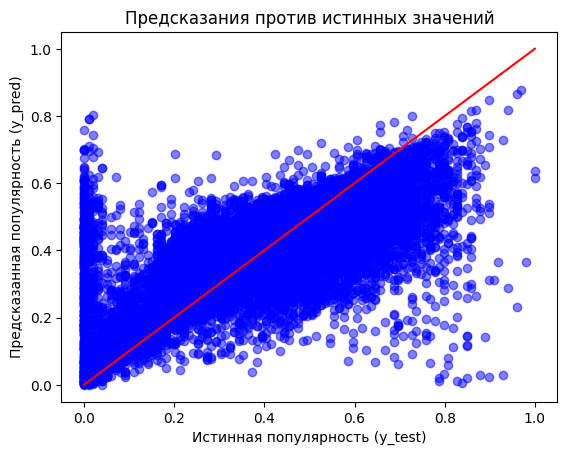

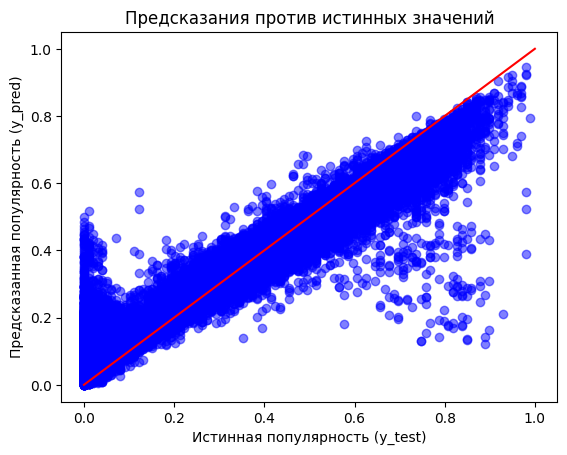

In [122]:
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

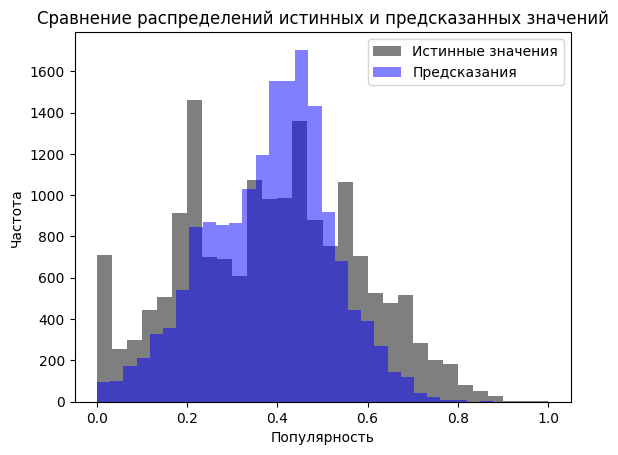

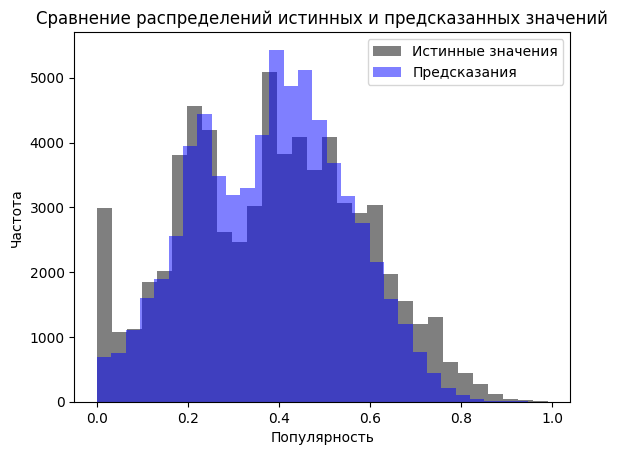

In [123]:
plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_test_pred, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

plt.hist(y_train, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_train_pred, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

Мы видим, что `explicit`, `mode` и `time_signature` имеют мало влияния, поэтому убираем их.

In [ ]:
#df = df.drop(columns = ['explicit', 'mode', 'time_signature'])

<Axes: >

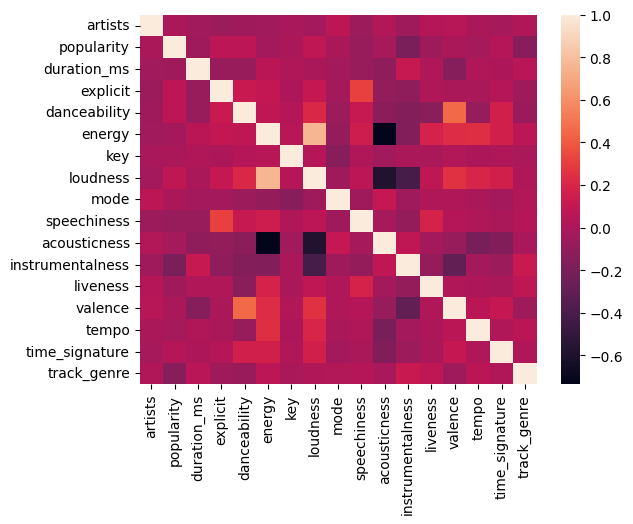

In [124]:
sns.heatmap(df.corr(numeric_only=True))

# Эксперименты с моделями

In [125]:
X = df.drop(columns = 'popularity')
print(X)

        artists  duration_ms  explicit  danceability    energy       key  \
0      0.032374     0.039593       0.0      0.669059  0.460989  0.090909   
1      0.043165     0.024044       0.0      0.394881  0.165983  0.090909   
2      0.000000     0.035787       0.0      0.414159  0.358987  0.000000   
3      0.050360     0.034081       0.0      0.229945  0.059581  0.000000   
4      0.028777     0.033491       0.0      0.606940  0.442989  0.181818   
...         ...          ...       ...           ...       ...       ...   
97816  0.010791     0.069198       0.0      0.129271  0.234985  0.454545   
97817  0.010791     0.069199       0.0      0.131413  0.116982  0.000000   
97818  0.046763     0.047420       0.0      0.618721  0.328986  0.000000   
97819  0.089928     0.049803       0.0      0.573739  0.505990  0.636364   
97820  0.046763     0.041734       0.0      0.508407  0.486990  0.090909   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0      

In [126]:
y = df['popularity']
print(y)

0        0.727273
1        0.545455
2        0.565657
3        0.707071
4        0.818182
           ...   
97816    0.202020
97817    0.212121
97818    0.212121
97819    0.404040
97820    0.212121
Name: popularity, Length: 83748, dtype: float64


In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [128]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [129]:
lr.fit(X_train, y_train)

LinearRegression()

In [130]:
y_predict_train = lr.predict(X_test)

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predict_train)
mse = mean_squared_error(y_test, y_predict_train)
r2 = r2_score(y_test, y_predict_train)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")

MAE: 0.15206520176238003
MSE: 0.03519487862957826
R²: 0.07487803564009665


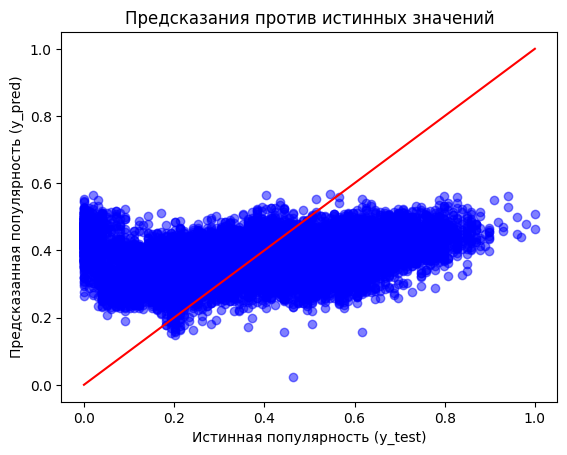

In [132]:
plt.scatter(y_test, y_predict_train, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

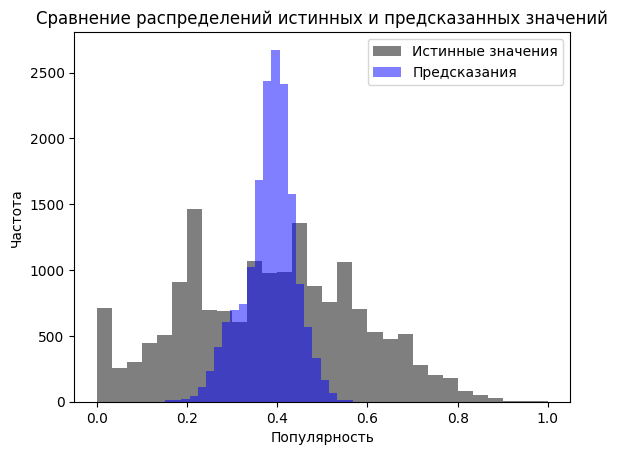

In [133]:
plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_train, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

In [134]:
coefficients = lr.coef_.reshape(-1)
lr_df = pd.DataFrame(data={'Feature': X.columns, 'Importance': np.abs(coefficients)})
lr_df = lr_df.sort_values(by='Importance', ascending=False)
print(lr_df)

             Feature  Importance
1        duration_ms    0.368858
8        speechiness    0.184412
6           loudness    0.150773
10  instrumentalness    0.118396
15       track_genre    0.099954
12           valence    0.078553
4             energy    0.075269
3       danceability    0.070078
2           explicit    0.041394
14    time_signature    0.037295
9       acousticness    0.017053
11          liveness    0.016700
0            artists    0.016323
13             tempo    0.006857
7               mode    0.004286
5                key    0.000467


In [135]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
regr = DecisionTreeRegressor(random_state=42)
regr.fit(X_train, y_train)
y_predict_train = regr.predict(X_test)

In [136]:
mae = mean_absolute_error(y_test, y_predict_train)
mse = mean_squared_error(y_test, y_predict_train)

print(f"MAE: {mae}")
print(f"MSE: {mse}")

MAE: 0.11868344640434195
MSE: 0.034874139899026


In [ ]:
!pip install xgboost

In [137]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

In [161]:
# Разделение на X и y
X = df.drop('popularity', axis=1)  # Признаки
y = df['popularity']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50, ), activation='relu', solver='lbfgs', max_iter=100, random_state=42, early_stopping=True, alpha=0.05)

mlp.fit(X_train, y_train)

y_predict_train = mlp.predict(X_train)
y_predict_test = mlp.predict(X_test)

mae = mean_absolute_error(y_test, y_predict_test)
mse = mean_squared_error(y_test, y_predict_test)
r2 = r2_score(y_test, y_predict_test)
r2_train = r2_score(y_train, y_predict_train)


print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"R² train: {r2_train}")

C:\Users\79049\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MAE: 0.1403275912938148
MSE: 0.0308042492586131
R²: 0.19028879500637352
R² train: 0.20208817882471353


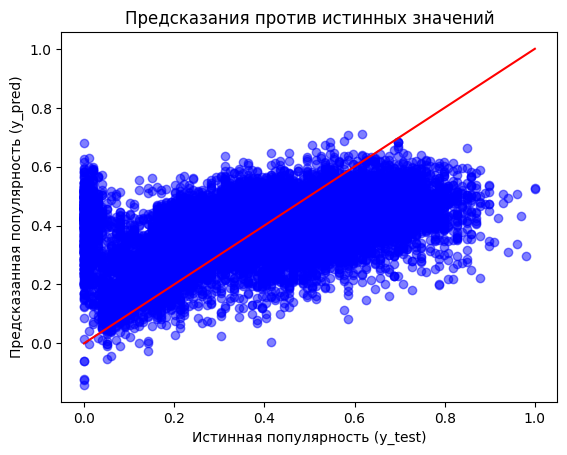

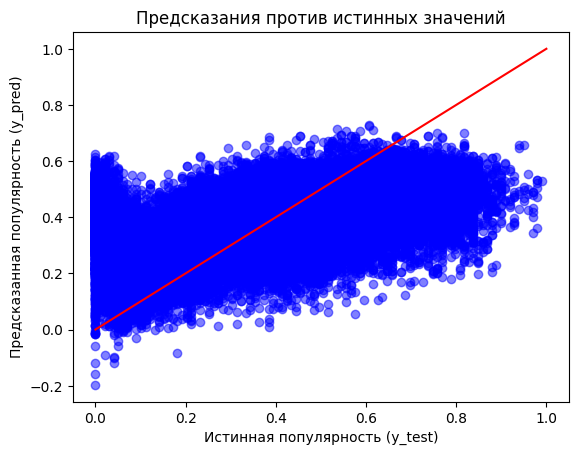

In [159]:
plt.scatter(y_test, y_predict_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()

plt.scatter(y_train, y_predict_train, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-')  # Линия идеальных предсказаний

plt.xlabel("Истинная популярность (y_test)")
plt.ylabel("Предсказанная популярность (y_pred)")
plt.title("Предсказания против истинных значений")
plt.show()


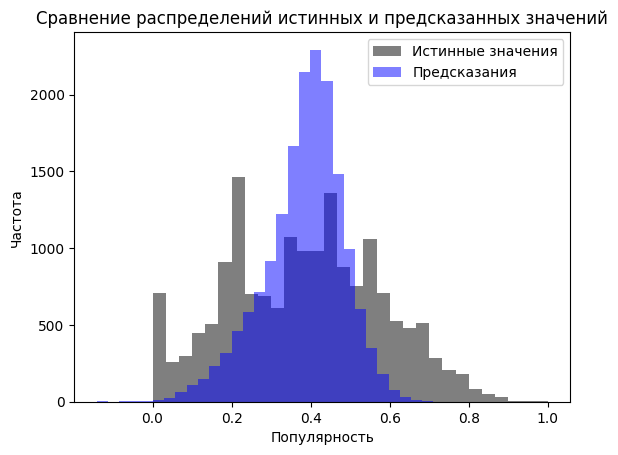

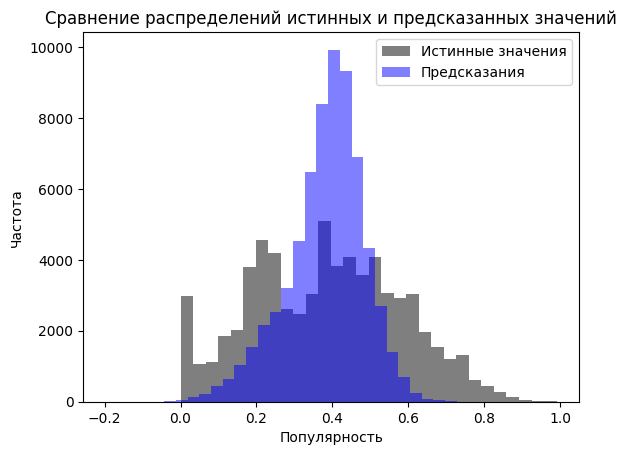

In [160]:
plt.hist(y_test, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_test, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

plt.hist(y_train, bins=30, alpha=0.5, label='Истинные значения', color='black')
plt.hist(y_predict_train, bins=30, alpha=0.5, label='Предсказания', color='blue')

plt.xlabel('Популярность')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений истинных и предсказанных значений')
plt.show()

In [60]:
# Модели
log_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Словарь моделей
models = {
    "Линейная регрессия": log_reg,
    "Дерево решений": decision_tree,
    "XGBoost": xgb_model,
    "Нейронная сеть": mlp
}

In [61]:
# Кросс-валидация с 5 фолдами
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Словарь для хранения результатов
results = {"MSE": {}, "MAE": {}, "R2": {}}

# Оценка моделей
for model_name, model in models.items():
    print(f"Оценка модели: {model_name}")

    # Кросс-валидация для MSE
    mse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    results["MSE"][model_name] = -mse_scores.mean()  # Скользящий знак для MSE

    # Кросс-валидация для MAE
    mae_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_absolute_error')
    results["MAE"][model_name] = -mae_scores.mean()  # Скользящий знак для MAE

    # Кросс-валидация для R²
    r2_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    results["R2"][model_name] = r2_scores.mean()

    print(f"MSE для {model_name}: {-mse_scores.mean():.4f}")
    print(f"MAE для {model_name}: {-mae_scores.mean():.4f}")
    print(f"R² для {model_name}: {r2_scores.mean():.4f}\n")

Оценка модели: Линейная регрессия
MSE для Линейная регрессия: 0.0475
MAE для Линейная регрессия: 0.1814
R² для Линейная регрессия: 0.0440

Оценка модели: Дерево решений
MSE для Дерево решений: 0.0448
MAE для Дерево решений: 0.1355
R² для Дерево решений: 0.0993

Оценка модели: XGBoost
MSE для XGBoost: 0.0345
MAE для XGBoost: 0.1457
R² для XGBoost: 0.3071

Оценка модели: Нейронная сеть
MSE для Нейронная сеть: 0.0449
MAE для Нейронная сеть: 0.1736
R² для Нейронная сеть: 0.0966



In [ ]:
# Выводим результаты
print("Результаты кросс-валидации для каждой модели:")
for metric in results:
    print(f"\nМетрика: {metric}")
    for model_name, score in results[metric].items():
        print(f"{model_name}: {score:.4f}")

# Выбираем лучшую модель по MSE или R²
best_model_name_mse = min(results["MSE"], key=results["MSE"].get)
best_model_mse = models[best_model_name_mse]

best_model_name_r2 = max(results["R2"], key=results["R2"].get)
best_model_r2 = models[best_model_name_r2]

print(f"\nЛучшая модель по MSE: {best_model_name_mse}")
print(f"Лучшая модель по R²: {best_model_name_r2}")

# Обучаем лучшую модель по MSE и оцениваем её на тестовых данных
best_model_mse.fit(X_train, y_train)
y_pred_mse = best_model_mse.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred_mse)
final_mae = mean_absolute_error(y_test, y_pred_mse)
final_r2 = r2_score(y_test, y_pred_mse)

print(f"\nОценка лучшей модели по MSE на тестовой выборке:")
print(f"MSE: {final_mse:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"R²: {final_r2:.4f}")

Результаты кросс-валидации для каждой модели:

Метрика: MSE
Линейная регрессия: 0.0357
Дерево решений: 0.0377
XGBoost: 0.0209
Нейронная сеть: 0.0319

Метрика: MAE
Линейная регрессия: 0.1533
Дерево решений: 0.1247
XGBoost: 0.1056
Нейронная сеть: 0.1437

Метрика: R2
Линейная регрессия: 0.0811
Дерево решений: 0.0304
XGBoost: 0.4632
Нейронная сеть: 0.1792

Лучшая модель по MSE: XGBoost
Лучшая модель по R²: XGBoost

Оценка лучшей модели по MSE на тестовой выборке:
MSE: 0.0199
MAE: 0.1032
R²: 0.4774
